# Çalışan Yıpranma Tahmini Projesi

## Problemin Tanımı ve Amaçlar

Kurumsal şirketlerin en önemli sıkıntılarından birisi de çalışanların şirket bağlılığının ve memnuniyetinin ölçülebilmesidir. Bu bilgiyi kullanarak şirketler çalışanlarına daha iyi bir çalışma ortamı sunabilmek ve çalışan mutluluğunu arttırabilmek için ne tür aksiyonlar almaları gerektiğine karar verebilir.

Aynı zamanda, kişi bazında yapılan analizlerde hangi çalışanların işten ayrılma ihtimalinin olduğu tespit edilebilirse şirket bu çalışanı elinde tutmak için bu kişiye promosyon teklif edebilir, veya bu kişinin yaşadığı sıkıntıları ortadan kaldırabilir.

Bu projedeki amaç, çalışan bilgilerini kullanarak hangi çalışanların yıpranma payının daha fazla olduğunu, dolayısıyla da işten ayrılmaya daha yatkın olabileceğini tespit etmektir. Bunu yaparken çalışan yıpranmasında hangi sebeplerin daha önemli olduğu bilgisini de bulmanız beklenmektedir.

#### Veri

Bu proje için kullanılacak veride toplamda 35 kolon bulunmaktadır.

| Name                       | Description                                                                                                                                                    |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| AGE                        | Numerical Value                                                                                                                                                |
| ATTRITION                  | Employee leaving the company (0=no, 1=yes)                                                                                                                     |
| BUSINESS TRAVEL            | (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)                                                                                                             |
| DAILY RATE                 | Numerical Value - Salary Level                                                                                                                                 |
| DEPARTMENT                 | (1=HR, 2=R&D, 3=Sales)                                                                                                                                         |
| DISTANCE FROM HOME         | Numerical Value - THE DISTANCE FROM WORK TO HOME                                                                                                               |
| EDUCATION                  | Numerical Value                                                                                                                                                |
| EDUCATION FIELD            | (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)                                                                               |
| EMPLOYEE COUNT             | Numerical Value                                                                                                                                                |
| EMPLOYEE NUMBER            | Numerical Value - EMPLOYEE ID                                                                                                                                  |
| ENVIROMENT SATISFACTION    | Numerical Value - SATISFACTION WITH THE ENVIROMENT                                                                                                             |
| GENDER                     | (1=FEMALE, 2=MALE)                                                                                                                                             |
| HOURLY RATE                | Numerical Value - HOURLY SALARY                                                                                                                                |
| JOB INVOLVEMENT            | Numerical Value - JOB INVOLVEMENT                                                                                                                              |
| JOB LEVEL                  | Numerical Value - LEVEL OF JOB                                                                                                                                 |
| JOB ROLE                   | (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE) |
| JOB SATISFACTION           | Numerical Value - SATISFACTION WITH THE JOB                                                                                                                    |
| MARITAL STATUS             | (1=DIVORCED, 2=MARRIED, 3=SINGLE)                                                                                                                              |
| MONTHLY INCOME             | Numerical Value - MONTHLY SALARY                                                                                                                               |
| MONTHY RATE                | Numerical Value - MONTHY RATE                                                                                                                                  |
| NUMCOMPANIES WORKED        | Numerical Value - NO. OF COMPANIES WORKED AT                                                                                                                   |
| OVER 18                    | (1=YES, 2=NO)                                                                                                                                                  |
| OVERTIME                   | (1=NO, 2=YES)                                                                                                                                                  |
| PERCENT SALARY HIKE        | Numerical Value - PERCENTAGE INCREASE IN SALARY                                                                                                                |
| PERFORMANCE RATING         | Numerical Value - ERFORMANCE RATING                                                                                                                            |
| RELATIONS SATISFACTION     | Numerical Value - RELATIONS SATISFACTION                                                                                                                       |
| STANDARD HOURS             | Numerical Value - STANDARD HOURS                                                                                                                               |
| STOCK OPTIONS LEVEL        | Numerical Value - STOCK OPTIONS                                                                                                                                |
| TOTAL WORKING YEARS        | Numerical Value - TOTAL YEARS WORKED                                                                                                                           |
| TRAINING TIMES LAST YEAR   | Numerical Value - HOURS SPENT TRAINING                                                                                                                         |
| WORK LIFE BALANCE          | Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE                                                                                                         |
| YEARS AT COMPANY           | Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY                                                                                                         |
| YEARS IN CURRENT ROLE      | Numerical Value -YEARS IN CURRENT ROLE                                                                                                                         |
| YEARS SINCE LAST PROMOTION | Numerical Value - LAST PROMOTION                                                                                                                               |
| YEARS WITH CURRENT MANAGER | Numerical Value - YEARS SPENT WITH CURRENT MANAGER      

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Kütüphaneler ve Ön Hazırlık

In [1]:
# Gerekli kütüphaneleri import et

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
# ...

### Verinin yüklenmesi

In [39]:
# veriyi train test verisi olarak yükle

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [40]:
train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,4,...,80,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,...,80,1,23,3,3,2,2,2,2,No
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,...,80,1,5,2,3,5,2,0,4,No
3,34,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,...,80,2,8,2,3,8,7,1,7,No
4,23,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Yes


In [41]:
test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,21,Travel_Rarely,1343,Sales,22,1,Technical Degree,1,669,3,...,80,0,3,2,3,3,2,1,2,No
1,24,Travel_Rarely,693,Sales,3,2,Life Sciences,1,720,1,...,80,0,4,3,3,2,2,2,0,Yes
2,42,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,836,2,...,80,1,10,3,2,9,8,7,8,No
3,46,Travel_Rarely,168,Sales,4,2,Marketing,1,1280,4,...,80,1,26,2,3,11,4,0,8,No
4,35,Travel_Frequently,880,Sales,12,4,Other,1,1667,4,...,80,0,13,2,4,11,9,6,7,Yes


<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Ön Analizi

##### Veride hangi kolonlar mevcut?

In [42]:
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [43]:
train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,4,...,80,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,...,80,1,23,3,3,2,2,2,2,No
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,...,80,1,5,2,3,5,2,0,4,No
3,34,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,...,80,2,8,2,3,8,7,1,7,No
4,23,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Yes


In [44]:
train.OverTime

0        No
1        No
2        No
3        No
4        No
       ... 
1318     No
1319     No
1320    Yes
1321    Yes
1322     No
Name: OverTime, Length: 1323, dtype: object

##### Hangi kolonlar kategorik veriler içeriyor?

* Kategorik Kolonlar: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime

##### Kolon Veri Tipleri neler? (numerik, alphanumerik, metin vb.)

In [45]:
train.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

##### Hangi kolonda ne kadar null/boş veri mevcut? (Test verisi için de bu bilgi gösterilebilir)

In [46]:
train.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [47]:
test.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

Veride hiç eksik veri bulunmuyor.

##### Numerik Kolonların İstatistiksel Değerleri

* Toplamda 1176 satır eğitim verisi mevcut.
* En yaşlı çalışan 60 yaşında, en genç çalışan 18 yaşında. Çalışanların çoğu 27, 45 yaş aralığında.
* EmployeeCount kolonunda sadece tek bir değer var.
* MonthlyIncome geniş bir aralığa dağılmış durumda.
* Over18 kolonu gereksiz.

In [48]:
for i in range(0, len(train.columns), 2):
    print()
    subcolumns = train.columns[i: min(len(train.columns),i+2)]
    print(train[subcolumns].describe(include = 'all'))


                Age BusinessTravel
count   1323.000000           1323
unique          NaN              3
top             NaN  Travel_Rarely
freq            NaN            948
mean      36.867725            NaN
std        9.130830            NaN
min       18.000000            NaN
25%       30.000000            NaN
50%       36.000000            NaN
75%       43.000000            NaN
max       60.000000            NaN

          DailyRate              Department
count   1323.000000                    1323
unique          NaN                       3
top             NaN  Research & Development
freq            NaN                     868
mean     803.411943                     NaN
std      403.410197                     NaN
min      102.000000                     NaN
25%      465.500000                     NaN
50%      802.000000                     NaN
75%     1164.500000                     NaN
max     1499.000000                     NaN

       DistanceFromHome    Education
count       

##### Kategorik kolonların İstatistiksel Değerleri

In [49]:
train.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
count,1323,1323,1323,1323,1323,1323,1323,1323,1323
unique,3,3,6,2,9,3,1,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,No
freq,948,868,541,796,290,612,1323,947,1110


In [50]:
cat_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]

for feature in cat_features:
    print(feature)
    print(train[feature].value_counts())
    print()

BusinessTravel
Travel_Rarely        948
Travel_Frequently    243
Non-Travel           132
Name: BusinessTravel, dtype: int64

Department
Research & Development    868
Sales                     399
Human Resources            56
Name: Department, dtype: int64

EducationField
Life Sciences       541
Medical             421
Marketing           137
Technical Degree    122
Other                78
Human Resources      24
Name: EducationField, dtype: int64

Gender
Male      796
Female    527
Name: Gender, dtype: int64

JobRole
Sales Executive              290
Research Scientist           264
Laboratory Technician        234
Manufacturing Director       131
Healthcare Representative    115
Manager                       91
Research Director             76
Sales Representative          75
Human Resources               47
Name: JobRole, dtype: int64

MaritalStatus
Married     612
Single      418
Divorced    293
Name: MaritalStatus, dtype: int64

Over18
Y    1323
Name: Over18, dtype: int64

OverTim

### Varsayımlar

Yaptığınız ilk gözlemler sonucunda yaptığınız varsayımları açıklayın.

**Eksik Verilerin Tamamlanması:** Hangi kolonlardaki veriler tamamlanabilir?

- Eksik veri bulunmamakta.

**Verilerin Düzeltilmesi**: Hangi kolonlardaki veriler ne tür düzeltmelere ihtiyaç duyabilir?

- Değer aralıkları arasında farklılıklar mevcut. Scaling uygulanabilir.
- EmployeeCount, EmployeeNumber ve Over18 kolonları kaldırılabilir.

**Yeni Özniteliklerin Yaratılması**: Bazı kolonları farklı şekillerde birleştirerek veya kolon değerlerini belirli işlemlerden geçirerek yeni öznitelikler yaratılabilir mi?

- Tecrübe yılı ve önceki çalıştığı firma sayısı kullanılarak ortalama şirket değiştirme süresi hesaplanabilir.
- Yaşın, tecrübenin, eğitimin ve iş seviyesinin maaşa oranı hesaplanabilir.
- Departman içerisindeki eğitim ve tecrübe seviyesiyle kişinin eğitim ve tecrübe seviyesi kıyaslanabilir.
- Aynı işi yapan diğer kişilerin maaşıyla mevcut kişinin maaş ortalaması kıyaslanabilir.
- Her departmanın ortalama Attrition değeri çıkarılabilir.

**Sınıflandırıcı Veriler**: Veri içerisinde model eğitimine katkı sağlayabilecek ne tür alt gruplar olabilir?

- Yaşı yüksek kişiler yıpranmaya daha açık olabilir.
- Yaşı yüksek kişiler, evli kişiler iş seyahatlerinden daha fazla yıpranıyor olabilir.
- Evli kişiler işten ayrılmaya daha az istekli olabilir.
- Evli kişiler için work life balance daha önemli olabilir.
- Genç çalışanlar için training programları daha önemli olabilir.

**İlişkili Veriler**: Veri içerisinde model eğitimine katkı sağlayabilecek ne tür ilişkiler olabilir?

-Hourly, daily, monthly rate ile income arasındaki ilişki incelenebilir.

**Ek Gözlemler/Varsayımlar**: 

-

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Analizi ve Görselleştirmeleri

### Univariate Analysis

In [51]:
cat_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]
numeric_features = list(set(train.columns) - set(cat_features))

In [52]:
numeric_features, len(numeric_features)

(['MonthlyRate',
  'WorkLifeBalance',
  'Age',
  'DistanceFromHome',
  'NumCompaniesWorked',
  'YearsInCurrentRole',
  'EmployeeCount',
  'TotalWorkingYears',
  'YearsWithCurrManager',
  'DailyRate',
  'StockOptionLevel',
  'JobSatisfaction',
  'HourlyRate',
  'RelationshipSatisfaction',
  'EnvironmentSatisfaction',
  'PerformanceRating',
  'StandardHours',
  'MonthlyIncome',
  'YearsAtCompany',
  'PercentSalaryHike',
  'TrainingTimesLastYear',
  'JobInvolvement',
  'JobLevel',
  'EmployeeNumber',
  'Education',
  'YearsSinceLastPromotion'],
 26)

#### Kagetorik Kolonların Değer Dağılımlarının Görselleştirilmesi

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


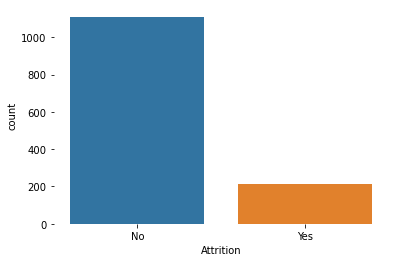

In [53]:
sns.countplot(train["Attrition"])
sns.despine(left=True, bottom=True)

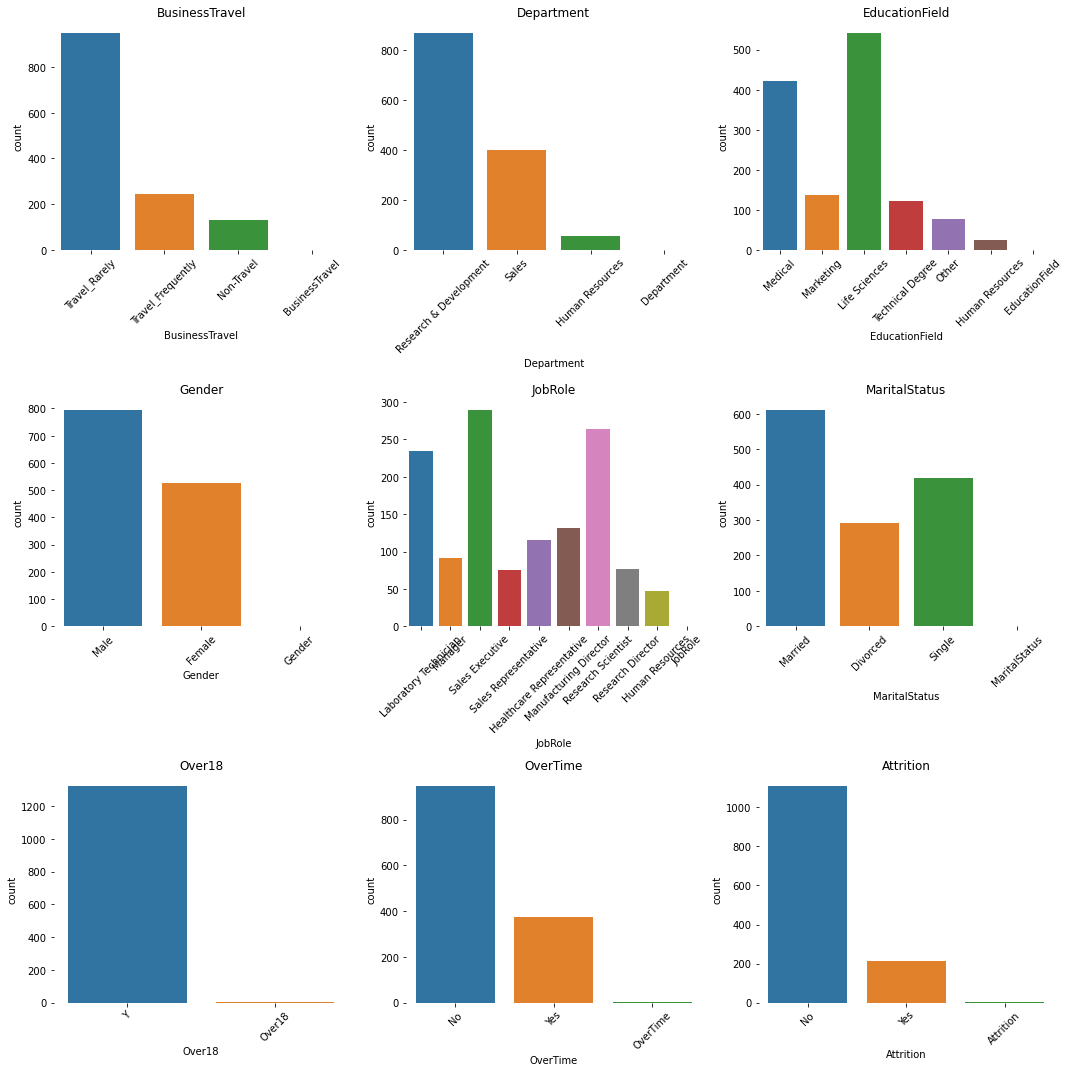

In [17]:
num_rows = 3
num_cols = 3
fig, ax = plt.subplots(num_cols, num_rows, figsize=(15, 15))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(cat_features):
        feature = cat_features[i]
        plot = sns.countplot(x=feature, data=train, ax=ax[row,col])
        plot.set_title(feature)
        plot.set_xticklabels(plot.get_xticklabels(),rotation = 45)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

- İşten ayrılan kişi sayısında dengesizlik mevcut. Başarım metrikleri buna göre düzenlenmeli.
- Çoğu çalışan nadiren iş gezisine çıkıyor. Eğer bir korelasyon bulunmazsa nadiren iş gezisine çıkanlar non-travel ile birleştirilebilir.
- Human resources departmanında çalışan çok az kişi var.
- Çalışanların çoğu medical ve Life Sciences eğitimine sahip.
- Kadın erkek çalışanları arasında ciddi bir dengesizlik bulunmamakta.
- Over18 kolonu gereksiz.
- Çalışanların çoğu OverTime çalışmıyor. Overtime çalışmakla yıpranma arasında bir ilişki olabilir.

#### Numerik Kolonların Değer Dağılımlarının Görselleştirilmesi

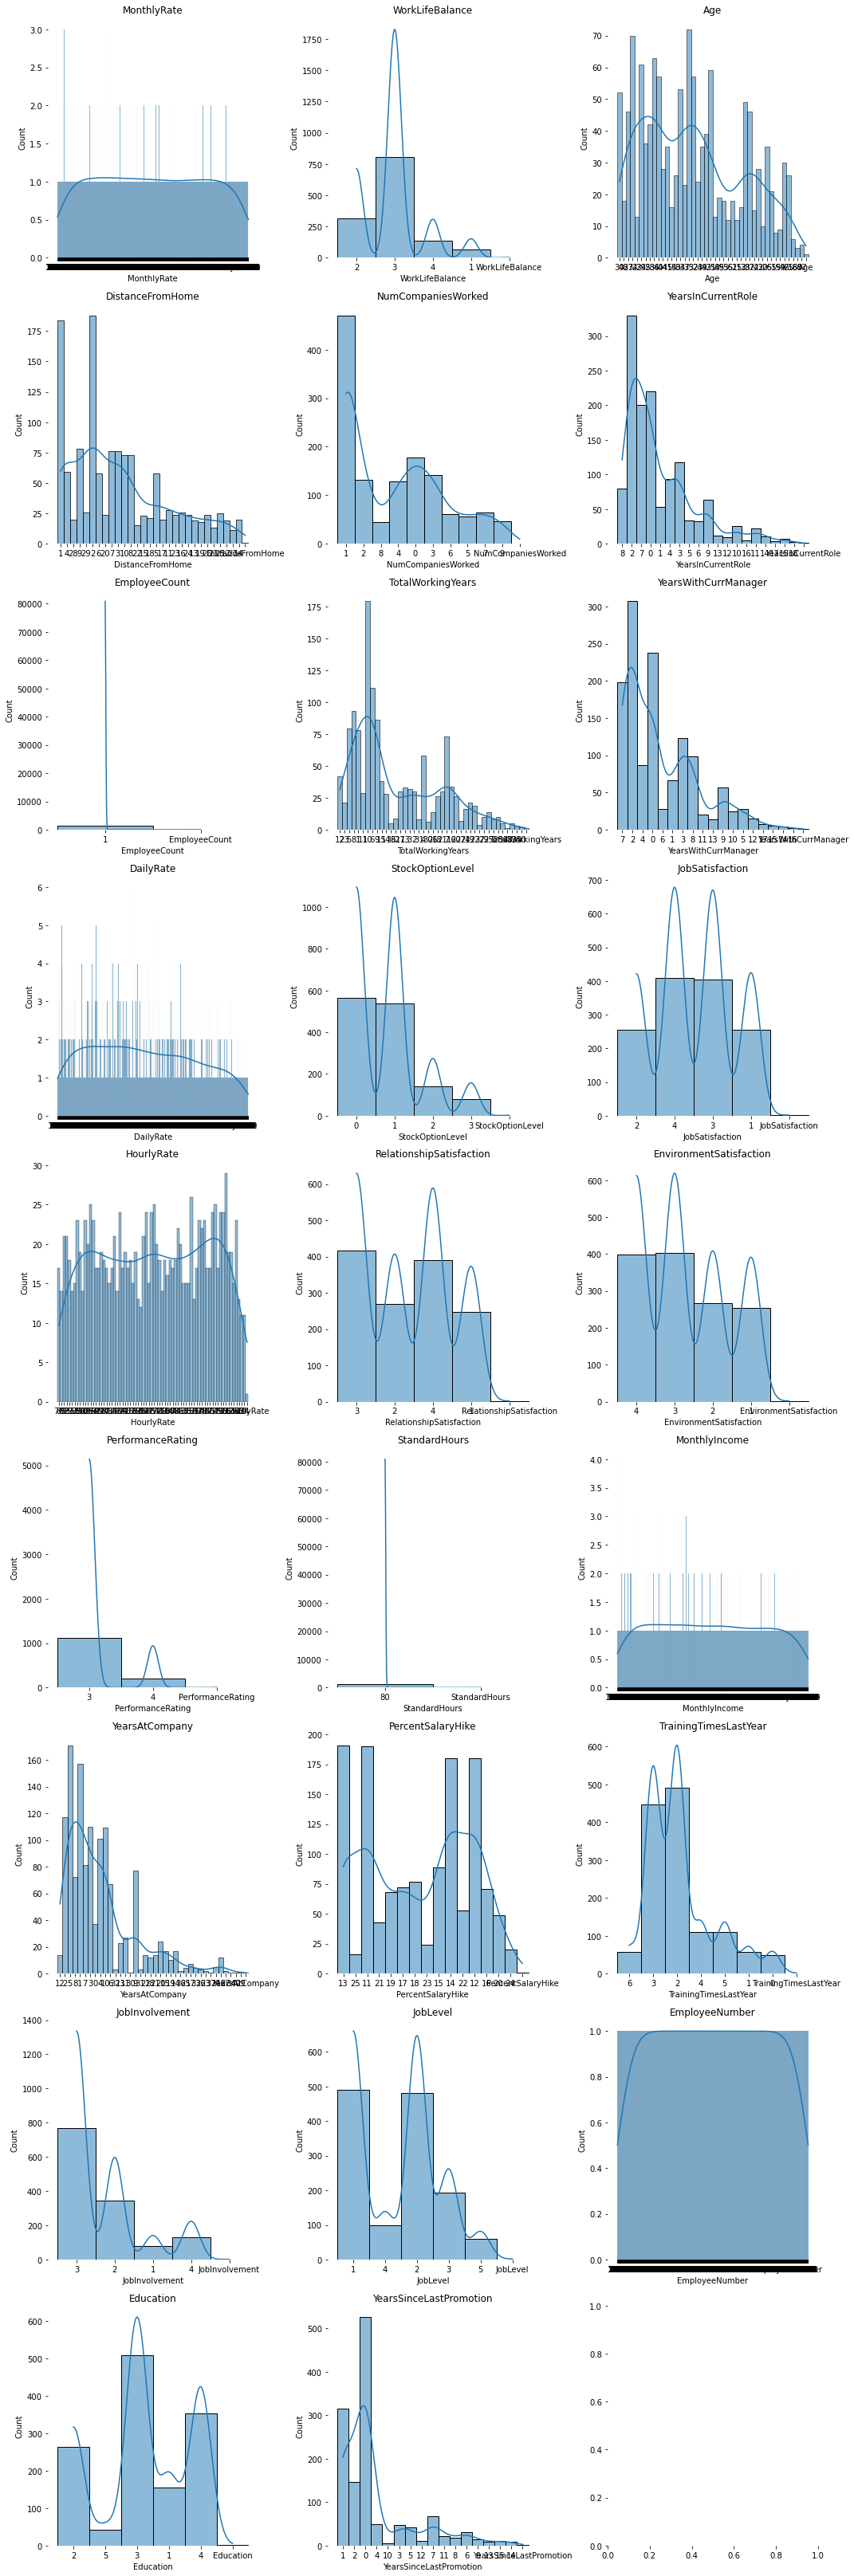

In [18]:
num_rows = 9
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 45))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(numeric_features):
        feature = numeric_features[i]
        plot = sns.histplot(x=feature, data=train, ax=ax[row,col], kde=True)
        plot.set_title(feature)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

- Standard Hours ve EmployeeCount kaldırılmalı.
- Years at Company 7 yıl civarında yığılmış durumda. 0-5, 5-10, 10> şeklinde üç kategoriye indirgenebilir.
- Yaş dağılımı normal dağılıma benzer görünüyor.
- Job ve relation satisfaction kolonlarında 1,2 seçenekleriyle 3,4 seçenekleri arasında benzer bir ayrım var. Aralarında bir korelasyon olabilir.
- Çalışanların yarısından azının stock option'u bulunmamakta. Eğer 2, 3 olmasıyla alakalı bir korelasyon yoksa stok var - stok yok şekline indirgenebilir.
- Çalışanlar arasında aylık gelir dengesizliği var. Çalışan seviyesine kıyasla düşül-orta-yüksek şeklinde üç kategorili yeni  bir kolon yaratılabilir.
- Mevcut rolde çalışma kolonunda 5 yıl civarında keskin bir ayrım mevcut. <5 >5 şeklinde binary yeni bir kolon yaratılabilir. 
- Çoğu çalışan kısa süre içerisinde terfi almış. Yakın zamanda terfi aldı-almadı şeklinde bir kolon yaratılabilir.
- Bazı çalışanlar diğerlerinden daha fazla zam almış durumda. 
- Şu anda ilk şirketinde çalışmakta olan çok fazla çalışan var. İlk şirketi veya değil şeklinde yeni bir kolon yaratılabilir.
- 5 yıldan fazladır mevcut yöneticiyle veya değil şeklinde bir kolon yaratılabilir.
- Çoğu çalışana iş yeri oldukça yakın. Yakın-orta-uzak şeklinde bir kolon yaratılabilir.
- Toplam çalışma yılında 10 yıl civarı bir yığılma mevcut. Bu veri de kategorik hale getirilebilir.
- 

### Bivariate Analysis

#### Kategorik Kolonlar ile Hedef Arasındaki İlişkilerin Görselleştirilmesi 

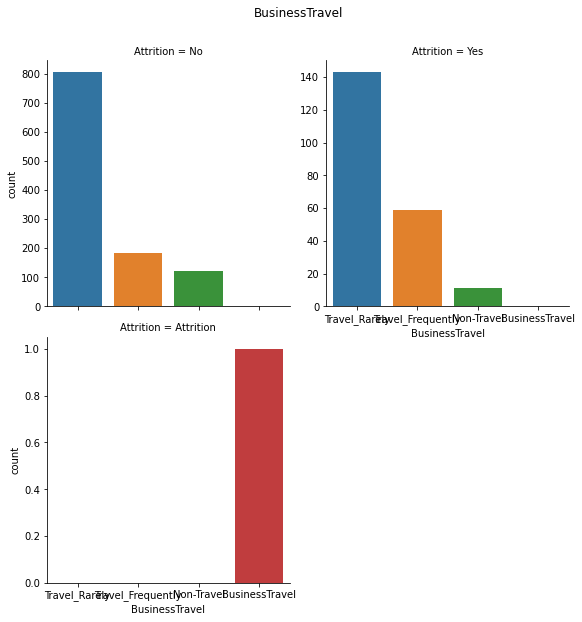

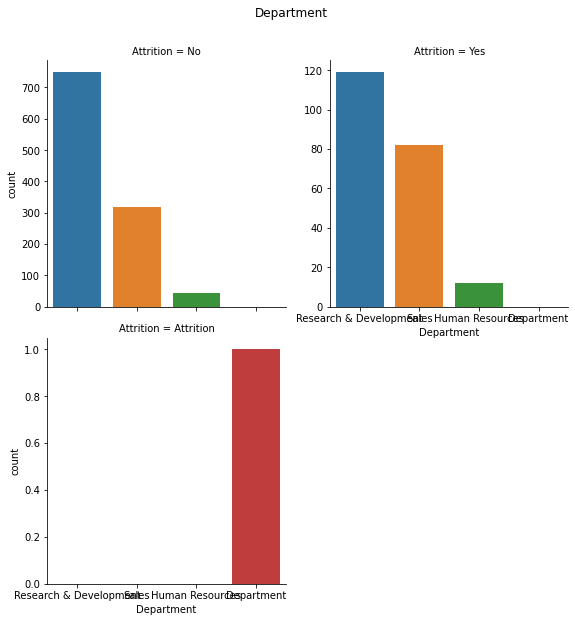

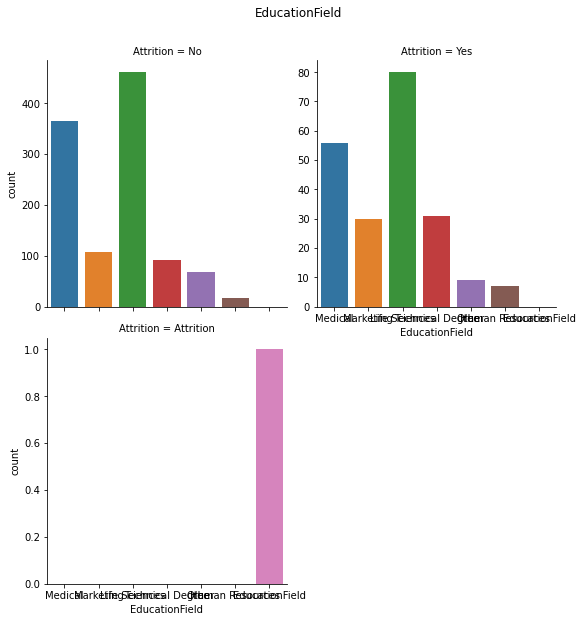

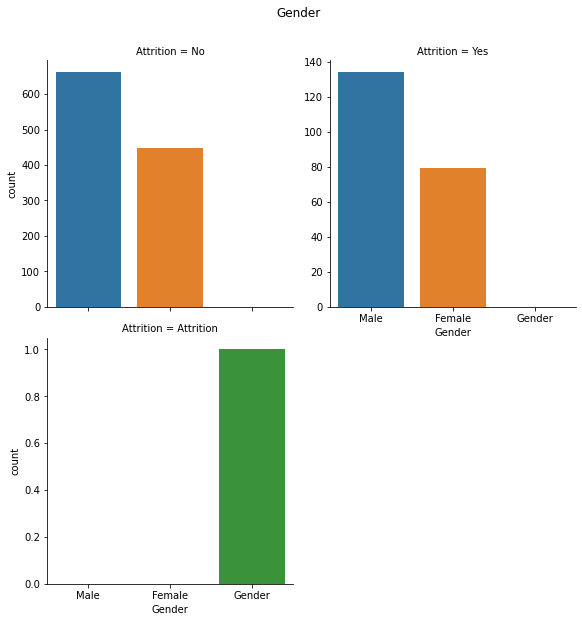

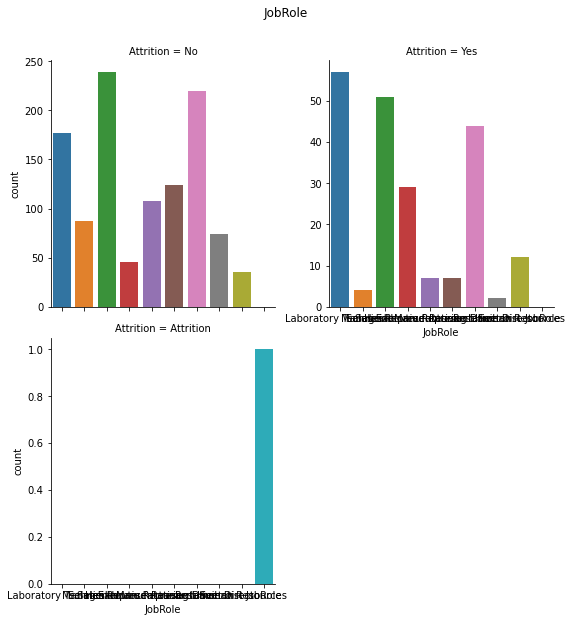

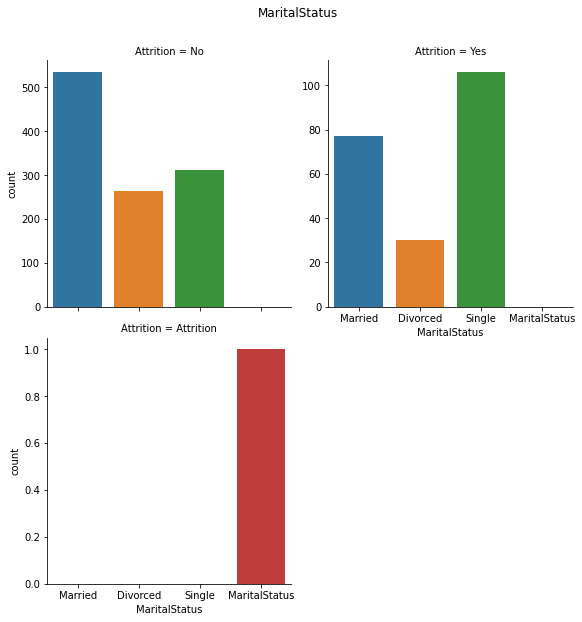

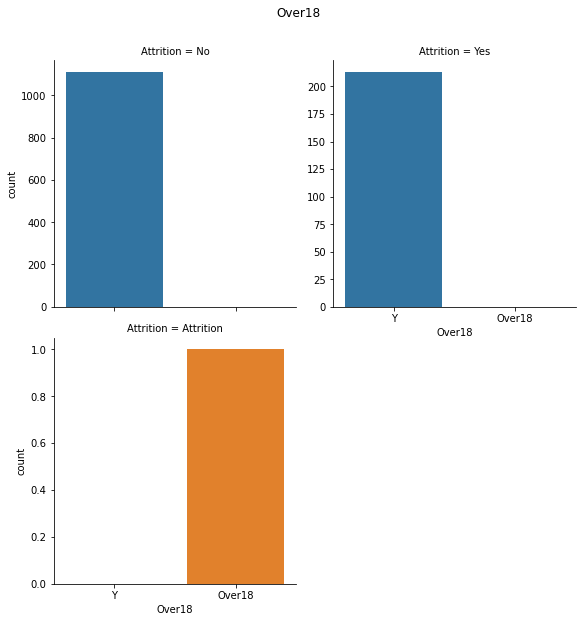

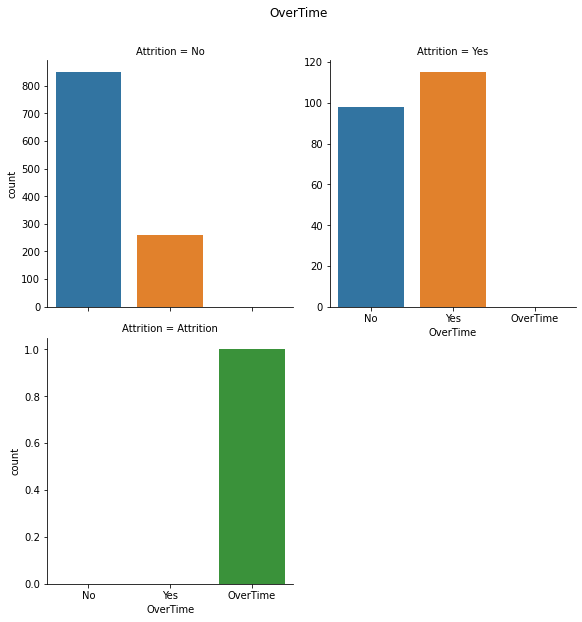

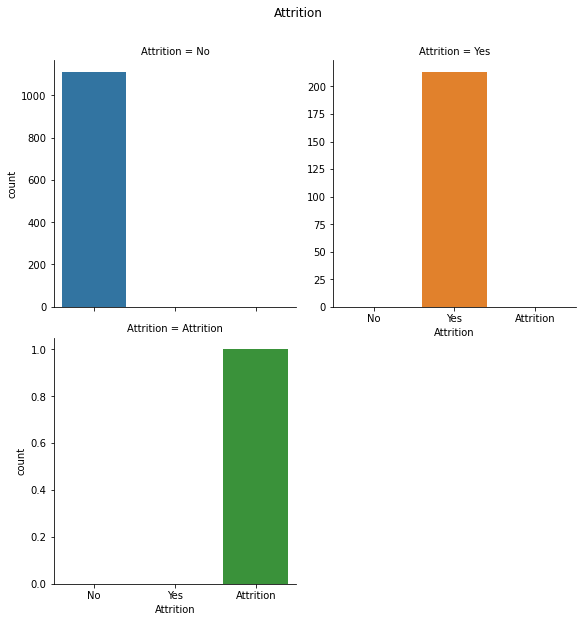

In [19]:
for feature in cat_features:
    fig = sns.catplot(x=feature, kind="count", col="Attrition", sharey=False, data=train, height=4, col_wrap=2)
    fig.fig.suptitle(feature, y=1.05)

#### Yorumlar

- Cinsiyetin attrition üzerinde doğrudan bir korelasyonu olmayabilir.
- Satış departmanındaki attrition oranı diğer departmanlara oranla daha yüksek gibi duruyor.
- JobRole kolonunun değerlerinin dağılımı attrition'a göre farklılık gösteriyor. Bir korelasyon olabilir.
- Bekarlık ile Attrition arasında bir ilişki olabilir.
- OverTime kolonuyla Attrition arasında bariz bir korelasyon mevcut.

#### Numerik Kolonlar ile Hedef Arasındaki İlişkilerin Görselleştirilmesi

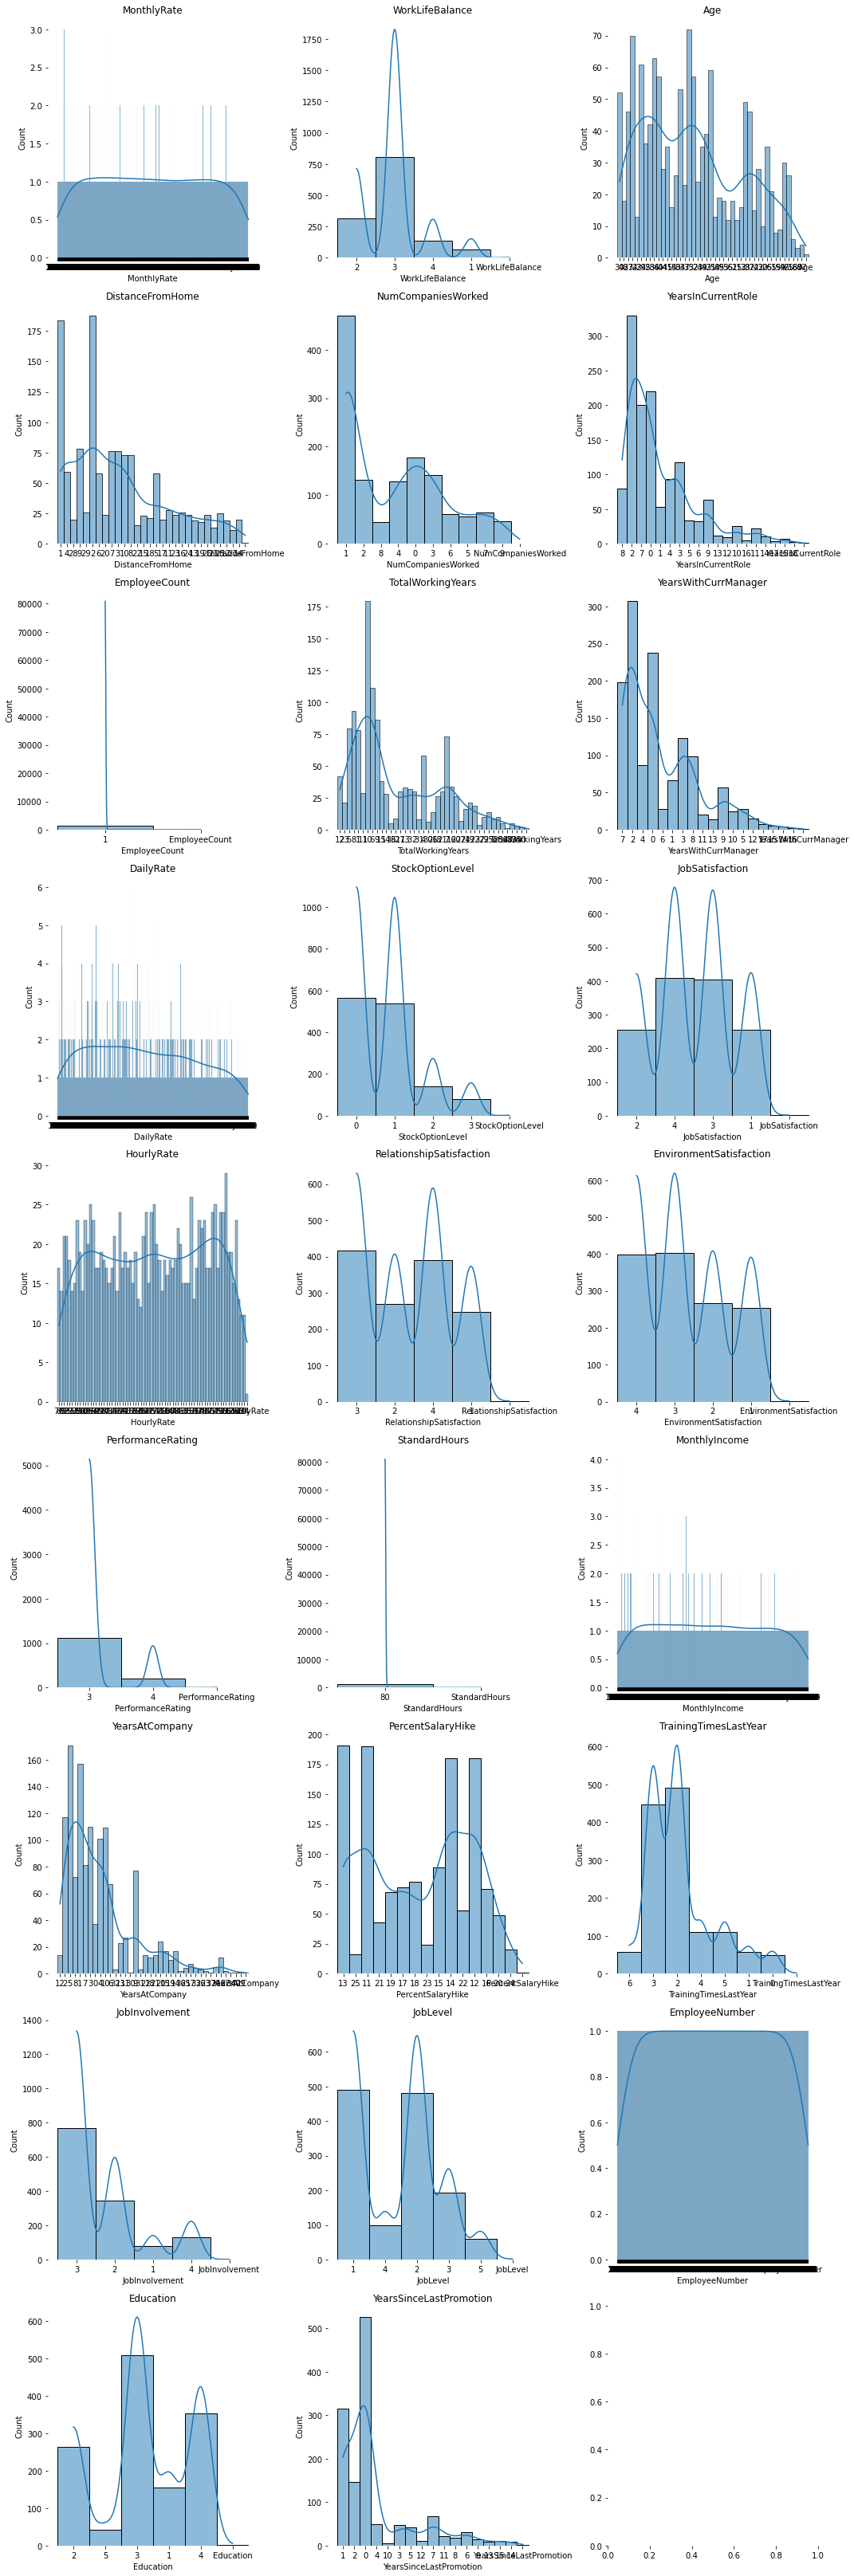

In [25]:
num_rows = 9
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 45))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(numeric_features):
        feature = numeric_features[i]
        plot = sns.histplot(x=feature, data=train, ax=ax[row,col], kde=True)
        plot.set_title(feature)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

- Çoğu kolonda bir attritiona göre farklı dağılım görülebilmekte.
- Environment Satisfaction değeri düşükse Attrition oranı artmakta.
- PerformanceRating değeri düşükse Attrition oranı daha düşük gibi gözüküyor.
- hourly rate 70 in üzerindeyse Attrition daha düşük gözüküyor.
- YearsSinceLastPromotion'ın doğrudan korelasyonu düşük gibi duruyor.
- Stock option var yok şekline getirilebilir.
- Education değerinin doğrudan bir korelasyonu olmayabilir
- Toplam çalışma yılı daha düşük çalışanlar düşük miktarda daha yüksek attrition gösteriyor.
- jobinvolment arttıkça attrition azalıyor gibi duruyor.
- job level 1 olanların attrition oranı ciddi oranda yüksek.
- Genç çalışanlar düşük miktarda daha yüksek attrition gösteriyor.

### Multivariate Analysis

#### Correlation Matrix

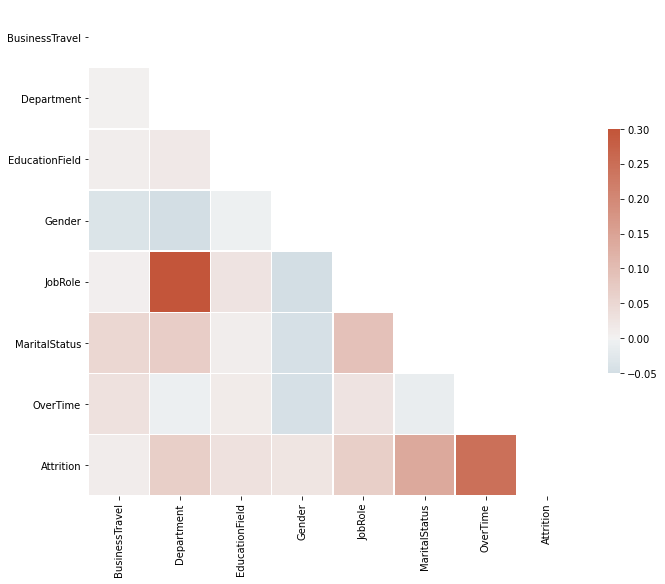

In [21]:
le = preprocessing.LabelEncoder()
columns_to_encode = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime", "Attrition"]

train_copy = train.copy()
train_copy[columns_to_encode] = train_copy[columns_to_encode].apply(le.fit_transform)

# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = train_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- Beklendiği üzere yaş ile yıl bazlı kolonların yüksek korelasyonu bulunmakta. MaritalStatus ile StockOptionLevel parametresinin önemli bir korelasyonu mevcut.

#### Farklı Kolonların Etkileşiminin Görselleştirilmesi

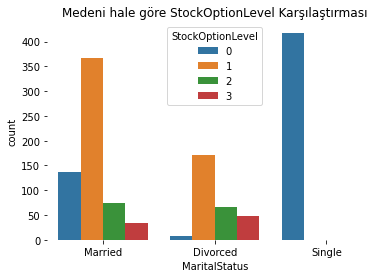

In [54]:
sns.countplot(x="MaritalStatus", hue="StockOptionLevel", data=train).set_title("Medeni hale göre StockOptionLevel Karşılaştırması")
sns.despine(left=True, bottom=True)

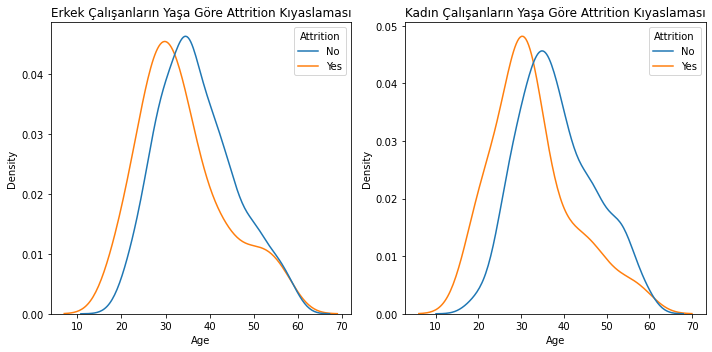

In [55]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

sns.kdeplot(data=train[train["Gender"] == "Male"], ax=ax[0], common_norm = False, x="Age", hue='Attrition').set_title('Erkek Çalışanların Yaşa Göre Attrition Kıyaslaması')
sns.kdeplot(data=train[train["Gender"] == "Female"], ax=ax[1], common_norm = False, x="Age", hue='Attrition').set_title('Kadın Çalışanların Yaşa Göre Attrition Kıyaslaması')
plt.tight_layout()

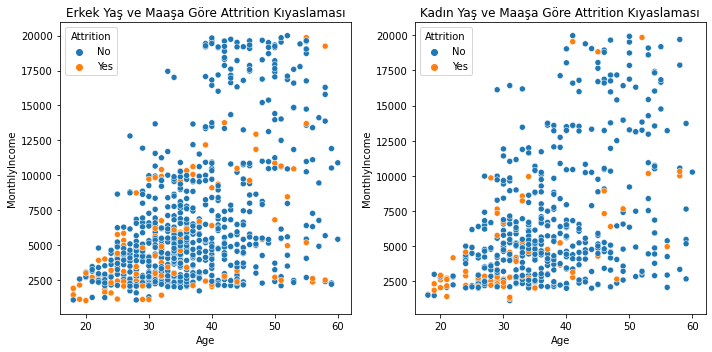

In [56]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

sns.scatterplot(data=train[train["Gender"] == "Male"], ax=ax[0], x="Age", y="MonthlyIncome", hue='Attrition').set_title('Erkek Yaş ve Maaşa Göre Attrition Kıyaslaması')
sns.scatterplot(data=train[train["Gender"] == "Female"], ax=ax[1], x="Age", y="MonthlyIncome", hue='Attrition').set_title('Kadın Yaş ve Maaşa Göre Attrition Kıyaslaması')
plt.tight_layout()

* Kadın çalışanların yaşı arttıkça attrition oranı düşmekte.
* Yaşa göre alınan maaşın attrition üzerinde belirgin bir etkisi bulunmamakta.

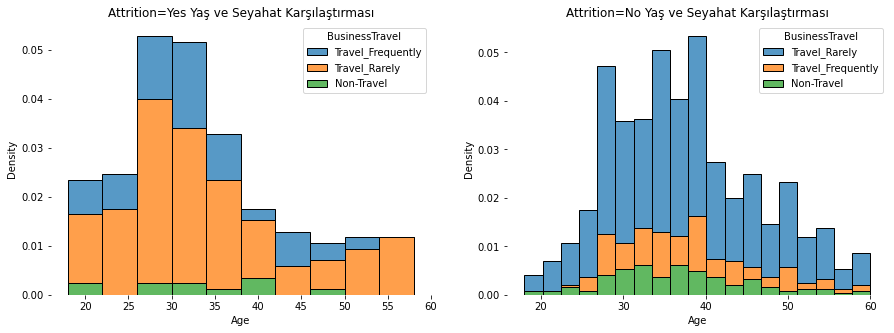

In [57]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

fig1 = sns.histplot(data=train[train["Attrition"] == "Yes"], x="Age", hue="BusinessTravel", multiple="stack", stat="density", ax=ax[0])
fig2 = sns.histplot(data=train[train["Attrition"] == "No"], x="Age", hue="BusinessTravel", multiple="stack", stat="density", ax=ax[1])

fig1.set_title("Attrition=Yes Yaş ve Seyahat Karşılaştırması")
fig2.set_title("Attrition=No Yaş ve Seyahat Karşılaştırması")

sns.despine(left=True, bottom=True)

Rarely veya Frequently seyahat oranı çok yüksek olduğu için çıkarım yapmak güç. Fakat Seyahat etmeyenlerin attrition oranının daha düşük olduğu görülmekte. Fakat yaşa bağlı olarak BusinessTravel kolonunun Attrition üzerinde ciddi bir etkisi olduğu görülmemekte.

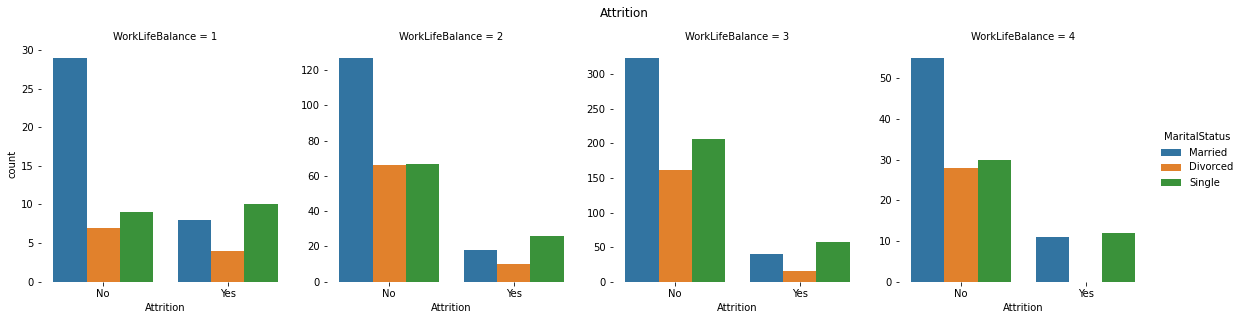

In [58]:

fig = sns.catplot(x="Attrition", kind="count", col="WorkLifeBalance", hue="MaritalStatus", sharey=False, data=train, height=4, col_wrap=4)
fig.fig.suptitle(feature, y=1.05)
sns.despine(left=True, bottom=True)

Medeni hale göre İş-Hayat dengesinin Attrition üzerinde ciddi bir etkisi görülmemekte.

### Veri Analizi Yorumları

-

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Düzenleme

In [59]:
train_cleaned = train.copy()

train_cleaned["Attrition"] = train_cleaned["Attrition"].map({"Yes": 1, "No": 0})

### Gereksiz Kolonların Silinmesi

In [60]:
columns_to_remove = ["EmployeeCount", "StandardHours", "Over18"]

train_cleaned = train_cleaned.drop(columns=columns_to_remove)

### Yeni Özniteliklerin Yaratılması (Mümkünse)

In [61]:
train_cleaned.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1989,4,Male,...,3,0,12,6,2,12,8,1,7,0
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1644,3,Male,...,2,1,23,3,3,2,2,2,2,0
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,497,4,Male,...,2,1,5,2,3,5,2,0,4,0
3,34,Travel_Rarely,704,Sales,28,3,Marketing,2035,4,Female,...,4,2,8,2,3,8,7,1,7,0
4,23,Travel_Frequently,638,Sales,9,3,Marketing,2023,4,Male,...,1,1,1,3,2,1,0,1,0,1


In [62]:
train_cleaned.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

#### Ortalama Attrition Değeri

MeanAttritionYear = TotalWorkingYears / NumCompaniesWorked

In [63]:
train_cleaned["MeanAttritionYear"] = train_cleaned["TotalWorkingYears"] / (train_cleaned["NumCompaniesWorked"] + 1)

In [64]:
train_cleaned["MeanAttritionYear"].describe()

count    1323.000000
mean        4.213083
std         4.054649
min         0.000000
25%         1.666667
50%         3.000000
75%         5.000000
max        38.000000
Name: MeanAttritionYear, dtype: float64

In [65]:
train_cleaned["MeanAttritionYear"].corr(train_cleaned["Attrition"])

-0.15595117986679508

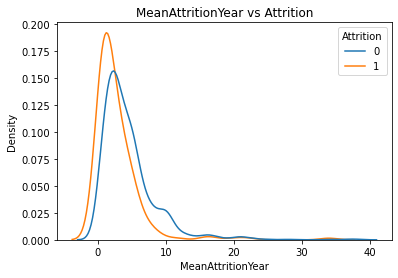

In [66]:
fig = sns.kdeplot(data=train_cleaned, x="MeanAttritionYear", hue="Attrition", common_norm=False)
_ = fig.set_title("MeanAttritionYear vs Attrition")

Yeni yarattığımız kolonun Attrition değeri ile arasında bir negatif korelasyon var. MeanAttritionYear değeri ne kadar yüksekse Attrition ihtimali o kadar azalıyor.

#### Tecrübenin Kategorik hale getirilmesi

In [67]:
bins = pd.IntervalIndex.from_tuples([(-1, 5), (5, 10), (10, 15), (15,100)])
cat_YearsAtCompany = pd.cut(train_cleaned["YearsAtCompany"].to_list(), bins)
cat_YearsAtCompany.categories = [0,1,2,3]

In [68]:
train_cleaned["YearsAtCompanyCat"] = cat_YearsAtCompany


In [69]:
train_cleaned["YearsAtCompanyCat"]

0       2
1       0
2       0
3       1
4       0
       ..
1318    0
1319    0
1320    0
1321    0
1322    1
Name: YearsAtCompanyCat, Length: 1323, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [70]:
train_cleaned["YearsAtCompany"].corr(train_cleaned["Attrition"])

-0.13649855966562324

In [71]:
train_cleaned["YearsAtCompanyCat"].corr(train_cleaned["Attrition"])

-0.13306808966686762

#### One Hot Encoding

In [72]:
# Attrition değişkeni yukarıda 0-1 olarak değiştirildi.
columns_to_encode = [
    "BusinessTravel", "Department", "EducationField", 
    "Gender", "JobRole", "MaritalStatus", "OverTime"
]

In [73]:
# bu şekilde manuel dönüştürme yapılabilir. Bunun yerine sklearn labelEncoder kullanılabilir.
# veya olduğu gibi bırakıp işi OneHotEncoder'ın halletmesi beklenebilir.
train_cleaned["BusinessTravel"] = train_cleaned["BusinessTravel"].map(
    {"Travel_Rarely": 1, "Travel_Frequently": 2, "Non-Travel": 0})

In [74]:
train_cleaned["Attrition"].unique()

array([0, 1], dtype=int64)

In [75]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='if_binary')
encoder_df = pd.DataFrame(encoder.fit_transform(train_cleaned[columns_to_encode]).toarray())
column_names = encoder.get_feature_names(columns_to_encode)
column_names

array(['BusinessTravel_0', 'BusinessTravel_1', 'BusinessTravel_2',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes'],
      dtype=object)

In [76]:
encoder_df.columns = column_names

In [77]:
train_cleaned.drop(columns=columns_to_encode, inplace=True, axis=1)
train_cleaned = train_cleaned.join(encoder_df)

#### Feature Extraction Kontrol

In [78]:
train_cleaned.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,30,911,1,2,1989,4,76,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,48,365,4,5,1644,3,89,2,4,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,27,1469,1,2,497,4,82,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,34,704,28,3,2035,4,95,2,2,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,23,638,9,3,2023,4,33,3,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [79]:
train_cleaned.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.867725,803.411943,9.195011,2.897959,1025.682540,2.715042,65.822373,2.715042,2.062736,2.730159,...,0.068783,0.099017,0.057445,0.199546,0.219199,0.056689,0.221466,0.462585,0.315949,0.284203
std,9.130830,403.410197,8.110139,1.027321,605.842709,1.092392,20.190381,0.722227,1.106231,1.096917,...,0.253181,0.298798,0.232779,0.399811,0.413860,0.231335,0.415391,0.498787,0.465068,0.451204
min,18.000000,102.000000,1.000000,1.000000,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.500000,2.000000,2.000000,491.500000,2.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1164.500000,14.000000,4.000000,1570.500000,4.000000,83.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,2065.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
train_cleaned.dtypes

Age                                     int64
DailyRate                               int64
DistanceFromHome                        int64
Education                               int64
EmployeeNumber                          int64
EnvironmentSatisfaction                 int64
HourlyRate                              int64
JobInvolvement                          int64
JobLevel                                int64
JobSatisfaction                         int64
MonthlyIncome                           int64
MonthlyRate                             int64
NumCompaniesWorked                      int64
PercentSalaryHike                       int64
PerformanceRating                       int64
RelationshipSatisfaction                int64
StockOptionLevel                        int64
TotalWorkingYears                       int64
TrainingTimesLastYear                   int64
WorkLifeBalance                         int64
YearsAtCompany                          int64
YearsInCurrentRole                

<hr style="height:0.5px;border-width:0;color:black;background-color:black">

### Öznitelik Seçimi
#### Yöntem 1: Kolineer Özniteliklerin Silinmesi

In [81]:
# Kolerasyon matrixinde mutlak değerlerin çıkarılması

corr_matrix = train_cleaned.corr().abs()
corr_matrix.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,0.003782,0.000826,0.203386,0.000482,0.018893,0.020671,0.030183,0.511035,0.001796,...,0.288285,0.053601,0.188996,0.146512,0.004276,0.167266,0.022488,0.088352,0.114843,0.023269
DailyRate,0.003782,1.000000,0.014959,0.030862,0.049031,0.038938,0.016604,0.058243,0.013399,0.023946,...,0.027947,0.006545,0.007542,0.012842,0.012665,0.010343,0.038420,0.030969,0.067530,0.010340
DistanceFromHome,0.000826,0.014959,1.000000,0.019095,0.037733,0.012165,0.029097,0.014918,0.016510,0.007940,...,0.037482,0.023241,0.019561,0.023908,0.043145,0.023637,0.018892,0.037334,0.023167,0.030733
Education,0.203386,0.030862,0.019095,1.000000,0.035292,0.031996,0.002079,0.046419,0.094828,0.013713,...,0.032822,0.013880,0.046672,0.016462,0.049090,0.093408,0.005499,0.010996,0.006882,0.012456
EmployeeNumber,0.000482,0.049031,0.037733,0.035292,1.000000,0.012743,0.033746,0.001569,0.003027,0.037653,...,0.021591,0.013390,0.004033,0.024337,0.018168,0.024464,0.027235,0.065184,0.045584,0.020648


In [82]:
# Kolerasyon üçgeninin oluşturulması

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,NaN,0.003782,0.000826,0.203386,0.000482,0.018893,0.020671,0.030183,0.511035,0.001796,...,0.288285,0.053601,0.188996,0.146512,0.004276,0.167266,0.022488,0.088352,0.114843,0.023269
DailyRate,NaN,NaN,0.014959,0.030862,0.049031,0.038938,0.016604,0.058243,0.013399,0.023946,...,0.027947,0.006545,0.007542,0.012842,0.012665,0.010343,0.038420,0.030969,0.067530,0.010340
DistanceFromHome,NaN,NaN,NaN,0.019095,0.037733,0.012165,0.029097,0.014918,0.016510,0.007940,...,0.037482,0.023241,0.019561,0.023908,0.043145,0.023637,0.018892,0.037334,0.023167,0.030733
Education,NaN,NaN,NaN,NaN,0.035292,0.031996,0.002079,0.046419,0.094828,0.013713,...,0.032822,0.013880,0.046672,0.016462,0.049090,0.093408,0.005499,0.010996,0.006882,0.012456
EmployeeNumber,NaN,NaN,NaN,NaN,NaN,0.012743,0.033746,0.001569,0.003027,0.037653,...,0.021591,0.013390,0.004033,0.024337,0.018168,0.024464,0.027235,0.065184,0.045584,0.020648


In [83]:
# Özniteliklerin silinme threshold'u
# Bu öznitelikler sadece tek boyutta bakılıyor. Nonlineeri anlayamaz.

threshold = 0.8

In [84]:
# Thresholdun üzerindeki korelasyonların seçilmesi
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('Silinecek kolon sayısı %d :' % (len(to_drop)))
print(to_drop)

Silinecek kolon sayısı 4 :
['MonthlyIncome', 'Department_Sales', 'JobRole_Human Resources', 'JobRole_Sales Executive']


In [85]:
selection1 = train_cleaned.drop(columns = to_drop)
selection1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.867725,803.411943,9.195011,2.897959,1025.682540,2.715042,65.822373,2.715042,2.062736,2.730159,...,0.176871,0.068783,0.099017,0.057445,0.199546,0.056689,0.221466,0.462585,0.315949,0.284203
std,9.130830,403.410197,8.110139,1.027321,605.842709,1.092392,20.190381,0.722227,1.106231,1.096917,...,0.381704,0.253181,0.298798,0.232779,0.399811,0.231335,0.415391,0.498787,0.465068,0.451204
min,18.000000,102.000000,1.000000,1.000000,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.500000,2.000000,2.000000,491.500000,2.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1164.500000,14.000000,4.000000,1570.500000,4.000000,83.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,2065.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
# Correlation matrix'den seçerek de silebiliriz.

In [87]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

selection2 = train_cleaned.drop(columns=['Attrition'])
selection2 = sel.fit_transform(selection2)

selection2

array([[3.000e+01, 9.110e+02, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.800e+01, 3.650e+02, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.700e+01, 1.469e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.500e+01, 5.990e+02, 2.400e+01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [3.800e+01, 2.680e+02, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [4.900e+01, 1.740e+02, 8.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [88]:
labels = train_cleaned['Attrition']
labels.head()

0    0
1    0
2    0
3    0
4    1
Name: Attrition, dtype: int64

In [89]:
selection3 = train_cleaned.drop(columns=['Attrition'])

In [90]:
selection3.shape

(1323, 52)

In [91]:
# Select k best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selection3 = SelectKBest(chi2, k=10).fit_transform(selection3, labels)

In [92]:
selection3

array([[3.00000000e+01, 9.11000000e+02, 1.98900000e+03, ...,
        8.00000000e+00, 7.00000000e+00, 6.00000000e+00],
       [4.80000000e+01, 3.65000000e+02, 1.64400000e+03, ...,
        2.00000000e+00, 2.00000000e+00, 7.66666667e+00],
       [2.70000000e+01, 1.46900000e+03, 4.97000000e+02, ...,
        2.00000000e+00, 4.00000000e+00, 2.50000000e+00],
       ...,
       [2.50000000e+01, 5.99000000e+02, 1.27300000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01],
       [3.80000000e+01, 2.68000000e+02, 7.73000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 8.57142857e-01],
       [4.90000000e+01, 1.74000000e+02, 1.13800000e+03, ...,
        8.00000000e+00, 3.00000000e+00, 3.14285714e+00]])

In [93]:
selection3.shape

(1323, 10)

In [94]:
# LinearSVC feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

selection4 = train_cleaned.drop(columns=['Attrition'])
selection4.shape


(1323, 52)

In [95]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(selection4, labels)
model = SelectFromModel(lsvc, prefit=True)
selection4 = model.transform(selection4)
selection4.shape

(1323, 18)

In [96]:
feature_idx = model.get_support()
print(feature_idx)


[ True  True  True False  True  True False  True False  True  True False
  True  True False False  True  True False False  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True]


In [97]:
new_train = train_cleaned.drop(columns=['Attrition'])

feature_name = new_train.columns[feature_idx]
feature_name

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'MeanAttritionYear', 'OverTime_Yes'],
      dtype='object')

In [98]:
# Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

selection5 = train_cleaned.drop(columns=['Attrition'])
selection5.shape


(1323, 52)

In [99]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(selection5, labels)
clf.feature_importances_  

array([0.03265669, 0.0258188 , 0.03132556, 0.01968689, 0.02445961,
       0.0327765 , 0.02341849, 0.02973581, 0.02577669, 0.03086062,
       0.03038902, 0.02270326, 0.02765554, 0.02291744, 0.01063302,
       0.02395522, 0.02231514, 0.02998496, 0.02187834, 0.02753777,
       0.02792779, 0.03027984, 0.02505567, 0.02925572, 0.03131033,
       0.01512419, 0.00518651, 0.01254525, 0.01749532, 0.00471459,
       0.00935502, 0.00994239, 0.00338296, 0.01399578, 0.00916183,
       0.01486825, 0.00479255, 0.01464185, 0.0198151 , 0.00580172,
       0.00414626, 0.01794067, 0.00469251, 0.00629316, 0.00237695,
       0.01119322, 0.00911641, 0.01363183, 0.00979781, 0.01288075,
       0.02439923, 0.06239316])

In [100]:
model = SelectFromModel(clf, prefit=True)
selection5 = model.transform(selection5)
selection5.shape

(1323, 27)

In [101]:
# Feature Selection as part of a pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

selection6 = train_cleaned.drop(columns=['Attrition'])
selection6.shape

(1323, 52)

In [102]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
#clf.fit(selection6, labels)

In [103]:
# Model eğittikten sonra feature importance ölçülmektedir. 
# Özniteliklerin önemini model eğittikten sonra grafik olarak koyabiliriz.

## Model Eğitimi 

In [104]:
from sklearn import metrics

dummy_y_true = [1, 1, 1, 0, 0, 0]
dummy_y_pred = [1, 1, 0, 1, 1, 0]
dummy_y_prob = [0.95, 0.55, 0.05, 0.55, 0.65, 0.10]

acc = metrics.accuracy_score(dummy_y_true, dummy_y_pred)
p = metrics.precision_score(dummy_y_true, dummy_y_pred)
r = metrics.recall_score(dummy_y_true, dummy_y_pred)
f1 = metrics.f1_score(dummy_y_true, dummy_y_pred)

fpr, tpr, thresholds = metrics.roc_curve(dummy_y_true, dummy_y_prob)
roc_auc = metrics.auc(fpr, tpr)

precision, recall, thresholds = metrics.precision_recall_curve(dummy_y_true, dummy_y_prob)
pr_auc = metrics.auc(recall, precision)

In [105]:
pd.DataFrame({
    'acc': acc,
    'p': p,
    'r': r,
    'f1': f1,
    'roc_auc': roc_auc,
    'pr_auc': pr_auc
}, index=['values'])

,acc,p,r,f1,roc_auc,pr_auc
values,0.5,0.5,0.666667,0.571429,0.5,0.65


Text(0, 0.5, 'TPR')

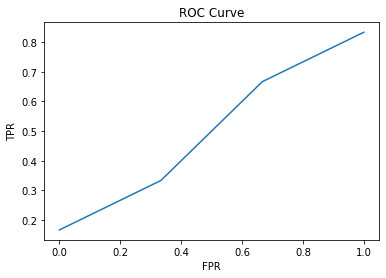

In [106]:
ax = sns.lineplot(x=fpr, y=tpr, ci=None)
ax.set_title('ROC Curve')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

Text(0, 0.5, 'Precision')

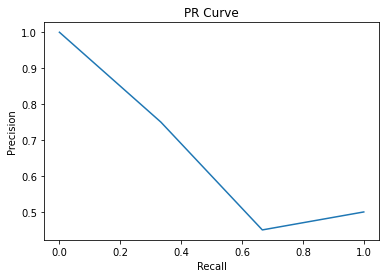

In [107]:
ax = sns.lineplot(x=recall, y=precision, ci=None)
ax.set_title('PR Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

### Başarım Ölçüm Metotları

In [108]:
from sklearn import metrics


def eval_clf(y_true, y_pred):
    acc = metrics.accuracy_score(y_true, y_pred)
    p = metrics.precision_score(y_true, y_pred)
    r = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    
    result = {
        'acc': acc,
        'p': p,
        'r': r,
        'f1': f1
    }
    
    return result


def eval_auc(y_true, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob)
    precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_prob)
    
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    
    result = {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }
    
    return result

    
def eval_threshold(y_true, y_prob, threshold):
    y_pred = np.where(np.array(y_prob) > threshold, 1, 0)

    return eval_clf(y_true, y_pred)

In [109]:
# TEST

dummy_y_true = [1, 1, 1, 0, 0, 0]
dummy_y_pred = [1, 1, 0, 1, 1, 0]
dummy_y_prob = [0.95, 0.55, 0.05, 0.55, 0.65, 0.10]


print('-' * 10)
print('res_clf')
res_clf = eval_clf(dummy_y_true, dummy_y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(dummy_y_true, dummy_y_prob)
print(res_auc)

print('-' * 10)
print('res_thr threshold=0.5')
res_thr = eval_threshold(dummy_y_true, dummy_y_prob, threshold=0.5)
print(res_thr)

print('-' * 10)
print('res_thr threshold=0.70')
res_thr = eval_threshold(dummy_y_true, dummy_y_prob, threshold=0.7)
print(res_thr)

----------
res_clf
{'acc': 0.5, 'p': 0.5, 'r': 0.6666666666666666, 'f1': 0.5714285714285715}
----------
res_auc
{'roc_auc': 0.5, 'pr_auc': 0.6499999999999999}
----------
res_thr threshold=0.5
{'acc': 0.5, 'p': 0.5, 'r': 0.6666666666666666, 'f1': 0.5714285714285715}
----------
res_thr threshold=0.70
{'acc': 0.6666666666666666, 'p': 1.0, 'r': 0.3333333333333333, 'f1': 0.5}


#### Veri Hazırlığı

In [110]:
y_data = train_cleaned['Attrition']
X_data = train_cleaned.drop(columns=['Attrition'])

In [111]:
print(X_data.shape)
print(y_data.shape)
assert X_data.shape[0] == y_data.shape[0]

(1323, 52)
(1323,)


In [112]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_data.values,
    y_data.values,
    test_size = 0.15,
    stratify = y_data,
    random_state = 42
)

### Logistic Regression

In [113]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [114]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=10000, random_state = 42)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [115]:
y_pred = classifier.predict(X_val_scaled)
y_prob_2d = classifier.predict_proba(X_val_scaled)

print('y_pred')
print(y_pred)
print('y_prob')
print(y_prob_2d)

y_pred
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
y_prob
[[9.99502050e-01 4.97950251e-04]
 [9.64161489e-01 3.58385107e-02]
 [9.99281057e-01 7.18942766e-04]
 [9.99757518e-01 2.42481508e-04]
 [9.85397194e-01 1.46028059e-02]
 [9.44918474e-01 5.50815260e-02]
 [9.98106452e-01 1.89354835e-03]
 [9.86871890e-01 1.31281103e-02]
 [9.86031091e-01 1.39689089e-02]
 [9.95471813e-01 4.52818681e-03]
 [9.99854439e-01 1.45561027e-04]
 [9.98923299e-01 1.07670116e-03]
 [9.88764680e-01 1.12353198e-02]
 [3.20276282e-01 6.79723718e-01]
 [3.71344781e-01 6.28655219e-01]
 [6.84950363e-01 3.15049637e-01]
 [9.77701094e-01 2.22989061e-02]
 [7.02069290e-02 9.2

In [116]:
y_prob = y_prob_2d[:, 1]
y_prob

array([4.97950251e-04, 3.58385107e-02, 7.18942766e-04, 2.42481508e-04,
       1.46028059e-02, 5.50815260e-02, 1.89354835e-03, 1.31281103e-02,
       1.39689089e-02, 4.52818681e-03, 1.45561027e-04, 1.07670116e-03,
       1.12353198e-02, 6.79723718e-01, 6.28655219e-01, 3.15049637e-01,
       2.22989061e-02, 9.29793071e-01, 1.99938317e-01, 6.46101334e-02,
       1.45109323e-04, 3.26844450e-07, 2.87568597e-02, 3.51004826e-04,
       2.56817535e-02, 6.58704311e-02, 3.18839142e-02, 3.57606443e-01,
       1.01954090e-01, 2.71627497e-01, 1.14691391e-01, 1.15465279e-01,
       1.02971396e-01, 1.95732000e-02, 6.98547303e-02, 9.52035149e-03,
       1.28607178e-02, 2.29457145e-01, 2.36042462e-02, 1.35001503e-01,
       3.07402841e-02, 7.50688645e-01, 1.16190858e-03, 1.54425204e-02,
       9.33822325e-01, 6.67020054e-01, 1.31175437e-03, 2.80728765e-02,
       7.18697794e-03, 1.19095742e-01, 2.47530055e-01, 1.32276833e-04,
       2.85504407e-03, 9.20894301e-03, 1.69804472e-01, 6.48948631e-01,
      

In [117]:
print ('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print ('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8743718592964824, 'p': 0.7058823529411765, 'r': 0.375, 'f1': 0.48979591836734687}
----------
res_auc
{'roc_auc': 0.783869760479042, 'pr_auc': 0.6093673739229993}


### K-Nearest Neighbour

In [118]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [119]:
y_pred = classifier.predict(X_val)
y_prob_2d = classifier.predict_proba(X_val)
y_prob = y_prob_2d[:, 1]

In [120]:
print ('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print ('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.7236180904522613, 'p': 0.23255813953488372, 'r': 0.3125, 'f1': 0.2666666666666667}
----------
res_auc
{'roc_auc': 0.5574476047904192, 'pr_auc': 0.3278054516769896}


### SVM

In [121]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [122]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42, probability = True, gamma = 'scale', shrinking = False)
classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42, shrinking=False)

In [123]:
y_pred = classifier.predict(X_val_scaled)
y_prob_2d = classifier.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [124]:
print ('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print ('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8693467336683417, 'p': 0.6666666666666666, 'r': 0.375, 'f1': 0.4800000000000001}
----------
res_auc
{'roc_auc': 0.7876122754491017, 'pr_auc': 0.6024978890118298}


### Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [126]:
y_pred = classifier.predict(X_val)
y_prob_2d = classifier.predict_proba(X_val)
y_prob = y_prob_2d[:, 1]

In [127]:
print ('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print ('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8040201005025126, 'p': 0.36, 'r': 0.28125, 'f1': 0.3157894736842105}
----------
res_auc
{'roc_auc': 0.5927208083832335, 'pr_auc': 0.3784139447236181}


### Random Forest

In [128]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [129]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [130]:
y_pred = classifier.predict(X_val_scaled)
y_prob_2d = classifier.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [131]:
print ('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print ('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8442211055276382, 'p': 0.6, 'r': 0.09375, 'f1': 0.16216216216216214}
----------
res_auc
{'roc_auc': 0.797249251497006, 'pr_auc': 0.5333333354515316}


### GBM

In [132]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [133]:
import pickle 

with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 1.0, max_depth = 4, random_state = 0)
classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=1000,
                           random_state=0)

In [136]:
y_pred = classifier.predict(X_val_scaled)
y_prob_2d = classifier.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [137]:

with open('gbm.pkl', 'wb') as f:
    pickle.dump(classifier, f)

In [138]:
print ('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print ('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8291457286432161, 'p': 0.4375, 'r': 0.21875, 'f1': 0.2916666666666667}
----------
res_auc
{'roc_auc': 0.6448353293413174, 'pr_auc': 0.3751414249675695}


### Hyperparameter Optimization

In [139]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = [
    {
        'max_iter' : [1000, 3000, 5000, 10000],
        'solver' : ['newton-cg', 'lbfgs'],
        'C' : [0.1, 0.5, 1, 5],
        'class_weight' : ['balanced', None]
    }
]

lr_clf = LogisticRegression()
clf = GridSearchCV(lr_clf, param_grid, scoring = 'roc_auc', verbose=True)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.5, 1, 5],
                          'class_weight': ['balanced', None],
                          'max_iter': [1000, 3000, 5000, 10000],
                          'solver': ['newton-cg', 'lbfgs']}],
             scoring='roc_auc', verbose=True)

In [141]:
clf.best_params_

{'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'solver': 'newton-cg'}

In [142]:
y_pred = clf.predict(X_val_scaled)
y_prob_2d = clf.predict_proba(X_val_scaled)
y_prob = y_prob_2d[:, 1]

In [143]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8793969849246231, 'p': 0.75, 'r': 0.375, 'f1': 0.5}
----------
res_auc
{'roc_auc': 0.7889221556886228, 'pr_auc': 0.6190424867384001}


In [158]:
import xgboost as xgb # XGBoost stuff
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during cross validation
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

### Model1:Logistic Regression for the model

In [146]:
X = train_cleaned.drop('Attrition',axis = 1).copy()

In [147]:
X.dtypes

Age                                     int64
DailyRate                               int64
DistanceFromHome                        int64
Education                               int64
EmployeeNumber                          int64
EnvironmentSatisfaction                 int64
HourlyRate                              int64
JobInvolvement                          int64
JobLevel                                int64
JobSatisfaction                         int64
MonthlyIncome                           int64
MonthlyRate                             int64
NumCompaniesWorked                      int64
PercentSalaryHike                       int64
PerformanceRating                       int64
RelationshipSatisfaction                int64
StockOptionLevel                        int64
TotalWorkingYears                       int64
TrainingTimesLastYear                   int64
WorkLifeBalance                         int64
YearsAtCompany                          int64
YearsInCurrentRole                

In [149]:
X.shape

(1323, 52)

In [150]:
y = train_cleaned['Attrition'].copy()

In [151]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Attrition, dtype: int64

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                random_state = 1,
                                                stratify = y)

In [153]:
print(y_train.shape)
print(y_test.shape)

(992,)
(331,)


In [154]:
print(sum(y)/len(y))
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.16099773242630386
0.16129032258064516
0.16012084592145015


In [155]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(penalty="l2",solver="liblinear",C=0.5,max_iter=100)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.906
Test Model accruracy scores: 0.885
--------------------------------------------------------------------------


### Model2:Building a Preliminary XGBoost Model

In [162]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
!pip install lightgbm

In [183]:
!conda install -c conda-forge lightgbm

^C


In [170]:
from lightgbm import LGBMClassifier

In [171]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [172]:
y_pred = lgbm_model.predict(X_test)

In [173]:
accuracy_score(y_test,y_pred)

0.8580060422960725

### Model Tuning

In [188]:
lgbm = LGBMClassifier()

In [189]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
              "n_estimators": [200, 500, 100],
              "max_depth":[1,2,35,8]}
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
lgbm_cv_model.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}

In [190]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}

In [191]:
lgbm_tuned = LGBMClassifier(learning_rate= 0.1, 
                            max_depth= 1, 
                            n_estimators= 500).fit(X_train, y_train)

In [213]:
y_pred = lgbm_tuned.predict(X_test)
y_prob_2d = lgbm_tuned.predict_proba(X_test)
y_prob = y_prob_2d[:, 1]

In [219]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


[[268  10]
 [ 33  20]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       278
           1       0.67      0.38      0.48        53

    accuracy                           0.87       331
   macro avg       0.78      0.67      0.70       331
weighted avg       0.85      0.87      0.85       331



In [220]:
import pickle 

with open('lgbm_tuned.pkl', 'wb') as f:
    pickle.dump(lgbm_tuned, f)

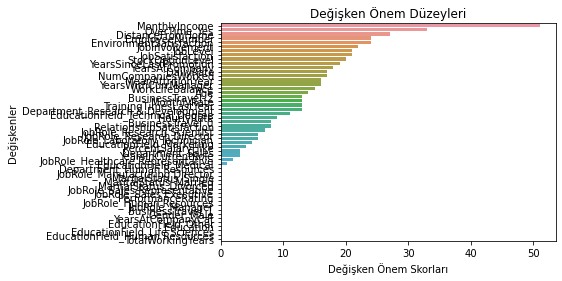

In [221]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

### Light GBM

In [195]:
from lightgbm import LGBMClassifier
clf_lgb = LGBMClassifier(random_state = 42)
clf_lgb.fit(X_train,y_train)

LGBMClassifier(random_state=42)

In [196]:
LGBMClassifier(random_state=42)

LGBMClassifier(random_state=42)

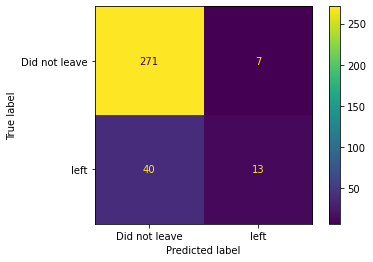

In [197]:
plot_confusion_matrix(clf_lgb,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels= ['Did not leave','left'])

In [198]:
parameters = {'num_leaves':[6,12,20],
             'n_estimators':[50,80,130],
             'learning_rate':[0.05,0.1,0.5]}
clf_lgb = LGBMClassifier(random_state = 42)
grid_search = GridSearchCV(clf_lgb,parameters,scoring = 'roc_auc',cv = 5)
grid_search.fit(X_train,y_train,early_stopping_rounds = 10,eval_metric = 'auc',eval_set = [(X_test,y_test)],verbose = False)
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 50, 'num_leaves': 6}

In [199]:
parameters = {'num_leaves':[12],
             'n_estimators':[20,30,50],
             'learning_rate':[0.1],
             'scale_pos_weight':[5,6,7]},

clf_lgb = LGBMClassifier(random_state = 42)
grid_search = GridSearchCV(clf_lgb,parameters,scoring = 'roc_auc',cv = 5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'learning_rate': 0.1,
 'n_estimators': 50,
 'num_leaves': 12,
 'scale_pos_weight': 6}

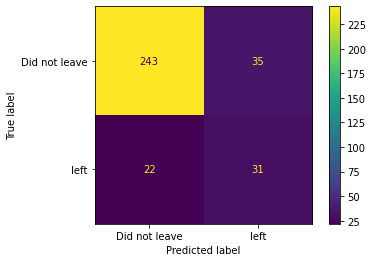

In [200]:
clf_lgb1 = LGBMClassifier(num_leaves = 12,
                          n_estimators= 50,
                          learning_rate=0.1,
                          scale_pos_weight = 6,
                          random_state = 42)

clf_lgb1.fit(X_train,y_train)

plot_confusion_matrix(clf_lgb1,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels= ['Did not leave','left'])

In [202]:
features = X.columns
importances = clf_lgb1.feature_importances_

importances_df = pd.DataFrame()
importances_df['feature_name'] = features
importances_df['feature_imp'] = importances
importances_df.sort_values('feature_imp',ascending = False)

,feature_name,feature_imp
10,MonthlyIncome,39
2,DistanceFromHome,37
0,Age,31
51,OverTime_Yes,31
4,EmployeeNumber,28
9,JobSatisfaction,28
24,MeanAttritionYear,27
5,EnvironmentSatisfaction,27
1,DailyRate,26
7,JobInvolvement,21


Template Hazırlanmasında Yardımcı Kaynak: https://www.kaggle.com/startupsci/titanic-data-science-solutions